# Handling Missing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [ ]:
string_data

check NaN values

In [ ]:
string_data.isnull()

dropping na values

In [ ]:
string_data.dropna()

In [ ]:
from numpy import nan as NA
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])

In [ ]:
data

In [ ]:
data.dropna()

you can set any all options
<br> all only drops if all the values are NAN
<br> any drops even if one data point is NA

In [ ]:
data.dropna(how="all")

## Filling In Missing Data

In [ ]:
data.fillna(0)

you can assign fill values differently for each column

In [ ]:
data.fillna({1: 0.5, 2: 0})

# Removing Duplicates

In [ ]:
 data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                           'k2': [1, 1, 2, 3, 3, 4, 4]})


In [ ]:
data

you can check the duplicated rows

In [ ]:
data.duplicated()

you can change the column to be checked

In [ ]:
data.duplicated(subset="k1")

to drop duplicates you can use drop_duplicates()

In [ ]:
data.drop_duplicates()

In [ ]:
data.drop_duplicates(subset="k1")

with keep option you can select which rows to be kept

In [ ]:
data.drop_duplicates(subset="k1",keep="last")

# GroupBy Mechanics

split-apply-combine for describing group operation

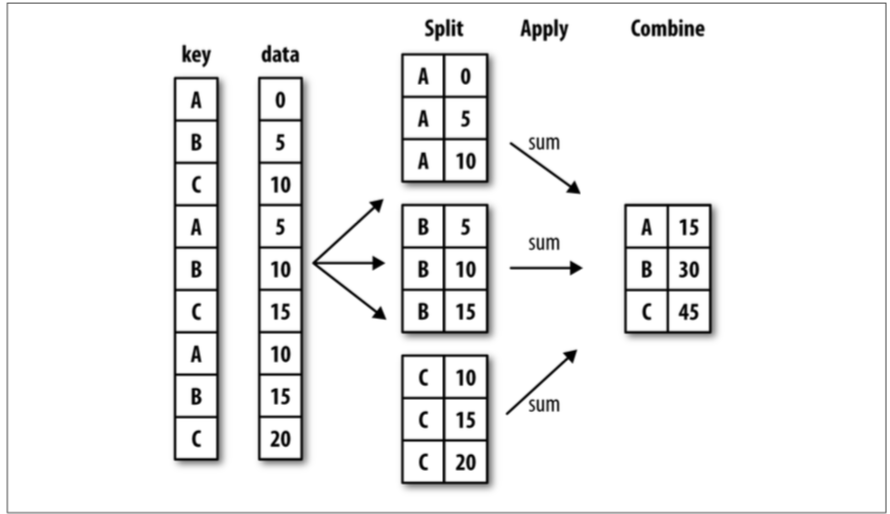

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})

In [ ]:
df

Suppose you wanted to compute the mean of the data1 column using the labels from key1.

There are a number of ways to do this. One is to access data1 and call groupby with the column (a Series) at key1:

In [ ]:
 grouped = df['data1'].groupby(df['key1'])

In [ ]:
grouped.groups

In [ ]:
grouped.mean()

The result index has the name 'key1' because the DataFrame column df['key1'] did.

alternatively:

In [ ]:
df.groupby('key1').mean()

that there is no key2 column in the result. Because df['key2'] is not numeric data

if you use more than one column for grouping, resulting dataframe have multiindex format

In [ ]:
df

In [ ]:
df.groupby(['key1',"key2"]).mean()

# Iterating Over Groups

The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data.

In [ ]:
for name, group in df.groupby('key1'): 
    print(name)
    print(group)

In the case of multiple keys, the first element in the tuple will be a tuple of key values:

In [ ]:
 for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

## Selecting a Column or Subset of Columns

you can select a column or a subset of columns

In [ ]:
df.groupby('key1')['data1']

In [ ]:
df.groupby('key1')[["data1"]]

depending on the selection it can return dataframe or series, even though we selected one series!!

In [ ]:
df.groupby('key1')[["data1"]].mean()

In [ ]:
df.groupby('key1')['data1'].mean()

# Data Aggregation

Aggregations refer to any data transformation that produces scalar values from arrays

Most commonly used operations optimzed in pandas

-
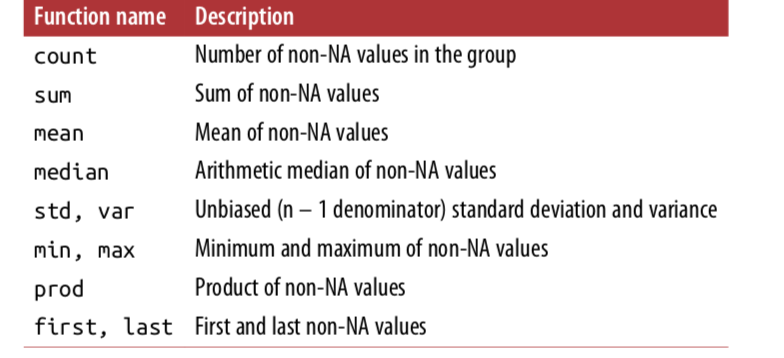

To use your own aggregation functions, pass any function that aggregates an array to the aggregate or agg method:

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [ ]:
df.groupby('key1').agg(peak_to_peak)

# Example: TIPS data

In [ ]:
tips = pd.read_csv('tips.csv')

In [ ]:
tips.head()

In [ ]:
#calculate the tip percentage
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [ ]:
tips.head()

In [ ]:
tips.groupby(["day","smoker"]).mean()

## Applying more than one function 

In [ ]:
tips.groupby(["day","smoker"]).agg([np.mean,np.std])

In [ ]:
tips.groupby(["day","smoker"]).agg(["mean","std",peak_to_peak])

## applying diferent functions to different columns

In [ ]:
tips.groupby(["day","smoker"]).agg({'tip' : np.max, 'size' : 'sum'})

In [ ]:
tips.groupby(["day","smoker"]).agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

# Returning Aggregated Data Without Row Indexes

In [ ]:
tips.groupby(["day","smoker"]).mean()

In [ ]:
tips.groupby(["day","smoker"],as_index=False).mean()

Of course, it’s always possible to obtain the result in this format by calling reset_index on the result. 
<br> Using the as_index=False method avoids some unneces‐ sary computations.

# using apply function with groupby 

In [ ]:
#this function sorts a dataframe and return the top n elements
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [ ]:
top(tips, n=6)

In [ ]:
tips.groupby('smoker').apply(top)

The top function is called on each row group from the DataFrame, and then the results are glued together using pandas.concat, labeling the pieces with the group names.

If you pass a function to apply that takes other arguments or keywords, you can pass these after the function:

In [ ]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

## Suppressing the Group Keys

In [ ]:
tips.groupby('smoker', group_keys=False).apply(top)

# Pivot Tables 

A pivot table is a data summarization tool frequently found in spreadsheet programs and other data analysis software. It aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns. Pivot tables in Python with pandas are made possible through the groupby facility described in this chapter combined with reshape operations utilizing hierarchical indexing.

In [ ]:
 tips.pivot_table(index=['day', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker', margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'], columns='day', aggfunc='mean', fill_value=0)